In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('Updated.csv')
column_to_delete=['store_nbr_2',
       'store_nbr_3', 'store_nbr_4', 'store_nbr_5', 'store_nbr_6',
       'store_nbr_7', 'store_nbr_8', 'store_nbr_9', 'store_nbr_10',
       'store_nbr_11', 'store_nbr_12', 'store_nbr_13', 'store_nbr_14',
       'store_nbr_15', 'store_nbr_16', 'store_nbr_17', 'store_nbr_18',
       'store_nbr_19', 'store_nbr_20', 'store_nbr_21', 'store_nbr_22',
       'store_nbr_23', 'store_nbr_24', 'store_nbr_25', 'store_nbr_26',
       'store_nbr_27', 'store_nbr_28', 'store_nbr_29', 'store_nbr_30',
       'store_nbr_31', 'store_nbr_32', 'store_nbr_33', 'store_nbr_34',
       'store_nbr_35', 'store_nbr_36', 'store_nbr_37', 'store_nbr_38',
       'store_nbr_39', 'store_nbr_40', 'store_nbr_41', 'store_nbr_42',
       'store_nbr_43', 'store_nbr_44', 'store_nbr_45', 'store_nbr_46',
       'store_nbr_47', 'store_nbr_48', 'store_nbr_49', 'store_nbr_50',
       'store_nbr_51', 'store_nbr_52', 'store_nbr_53', 'store_nbr_54',
       'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD', 'month_encoded',
       'day_encoded', 'year_encoded', 'day_of_week_encoded']

df.drop(column_to_delete, axis=1, inplace=True)
column_to_delete=['Unnamed: 0','id','date','dataset']
df.drop(column_to_delete, axis=1, inplace=True)
df.dropna(subset=['sales'], inplace=True)
df.drop('onpromotion', axis=1, inplace=True)

In [3]:
df

,sales,dcoilwtico,transactions,is_holiday,group_ids,date_idx
0,0.000,93.14,1395.0,1,-1,0
1,0.000,93.14,1395.0,1,-1,0
2,0.000,93.14,1395.0,1,-1,0
3,0.000,93.14,1395.0,1,-1,0
4,0.000,93.14,1395.0,1,-1,0
...,...,...,...,...,...,...
3054343,438.133,47.57,2155.0,1,9,1683
3054344,154.553,47.57,2155.0,1,9,1683
3054345,2419.729,47.57,2155.0,1,9,1683
3054346,121.000,47.57,2155.0,1,9,1683


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming `df` is your DataFrame
df = df.sort_values(by="date_idx")

# 80-20 split
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]


In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Features and target
features = ["dcoilwtico", "transactions", "is_holiday", "group_ids"]
target = "sales"

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df[features + [target]])
test_scaled = scaler.transform(test_df[features + [target]])

# Create sequences
def create_sequences(data, target_idx, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])
        y.append(data[i+seq_length, target_idx])
    return np.array(X), np.array(y)

seq_length = 30  # Window size
X_train, y_train = create_sequences(train_scaled, -1, seq_length)
X_test, y_test = create_sequences(test_scaled, -1, seq_length)


In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout


model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dense(1)  # Output layer for regression
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
38179/38179 ━━━━━━━━━━━━━━━━━━━━ 175s 5ms/step - loss: 8.2512e-05 - mae: 0.0043 - val_loss: 1.1600e-04 - val_mae: 0.0049
Epoch 2/10
38179/38179 ━━━━━━━━━━━━━━━━━━━━ 173s 5ms/step - loss: 6.6227e-05 - mae: 0.0037 - val_loss: 1.1618e-04 - val_mae: 0.0049
Epoch 3/10
38179/38179 ━━━━━━━━━━━━━━━━━━━━ 173s 5ms/step - loss: 6.5750e-05 - mae: 0.0037 - val_loss: 1.1613e-04 - val_mae: 0.0049
Epoch 4/10
38179/38179 ━━━━━━━━━━━━━━━━━━━━ 176s 5ms/step - loss: 6.6332e-05 - mae: 0.0037 - val_loss: 1.1638e-04 - val_mae: 0.0048
Epoch 5/10
38179/38179 ━━━━━━━━━━━━━━━━━━━━ 176s 5ms/step - loss: 6.4963e-05 - mae: 0.0037 - val_loss: 1.1745e-04 - val_mae: 0.0045
Epoch 6/10
38179/38179 ━━━━━━━━━━━━━━━━━━━━ 175s 5ms/step - loss: 6.6027e-05 - mae: 0.0037 - val_loss: 1.1827e-04 - val_mae: 0.0044
Epoch 7/10
38179/38179 ━━━━━━━━━━━━━━━━━━━━ 175s 5ms/step - loss: 6.5384e-05 - mae: 0.0037 - val_loss: 1.1750e-04 - val_mae: 0.0045
Epoch 8/10
38179/38179 ━━━━━━━━━━━━━━━━━━━━ 175s 5ms/step - loss: 6.6245e-05

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Predictions
y_pred = model.predict(X_test)

# Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmlse = np.sqrt(mean_squared_error(np.log1p(y_test), np.log1p(y_pred)))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"RMLSE: {rmlse:.4f}")
print(f"MAE: {mae:.4f}")


19089/19089 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step
RMSE: 0.0108
RMLSE: 0.0104
MAE: 0.0051


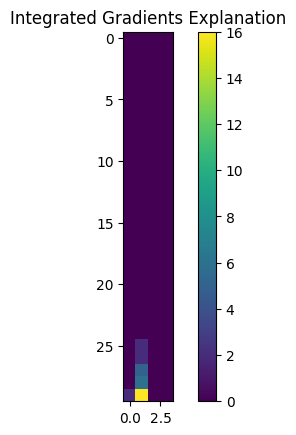

In [15]:
import tensorflow as tf
from tf_explain.core.integrated_gradients import IntegratedGradients

# Define explainer
explainer = IntegratedGradients()

# Select one example and reshape it to add a channel dimension
# Assuming X_test has shape (n_samples, timesteps, features)
sample = X_test[0].reshape(1, X_test.shape[1], X_test.shape[2], 1)  # Add channel dimension

# For regression, you can pass `class_index=None`
explanation = explainer.explain((sample, None), model, class_index=None)

# Plot the explanation
import matplotlib.pyplot as plt
plt.imshow(explanation, cmap='viridis')
plt.colorbar()
plt.title("Integrated Gradients Explanation")
plt.show()


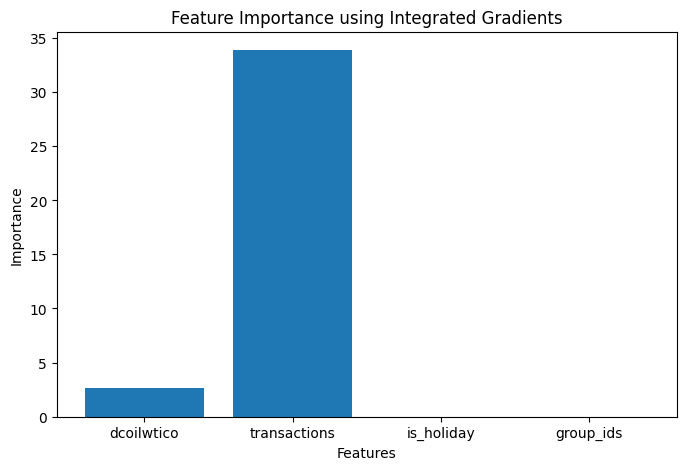

: 

In [ ]:
import tensorflow as tf
from tf_explain.core.integrated_gradients import IntegratedGradients
import numpy as np
import matplotlib.pyplot as plt

# Define the explainer
explainer = IntegratedGradients()

# Initialize an array to accumulate feature attributions
feature_importances = np.zeros(X_test.shape[2])  # Match the number of features (4 in this case)

# Loop through the test dataset and compute attributions for each sample
for i in range(len(X_test)):
    # Reshape each sample to add the channel dimension
    sample = X_test[i].reshape(1, X_test.shape[1], X_test.shape[2], 1)
    
    # Compute attributions using Integrated Gradients
    explanation = explainer.explain((sample, None), model, class_index=None)
    
    # Explanation shape is (30, 4) -> Aggregate attributions across timesteps
    attributions = np.sum(explanation, axis=0)  # Resulting shape: (features,)
    
    # Accumulate the attributions
    feature_importances += attributions

# Normalize feature importances
feature_importances /= len(X_test)

# Plot the aggregated feature importance
plt.figure(figsize=(8, 5))
plt.bar(range(len(feature_importances)), feature_importances, tick_label=["dcoilwtico", "transactions", "is_holiday", "group_ids"])
plt.title("Feature Importance using Integrated Gradients")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
